In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nasa = pd.read_csv('../Resources/NASA_GEOSS2S_FULL_LDC.csv')
nasa

,L,MON,LDC_SST_NASA_GEOSS2S,LDC_SST_NASA_GEOSS2S_ONETWO,LDC_SST_NASA_GEOSS2S_THREE,LDC_SST_NASA_GEOSS2S_FOUR
0,1.5,0000 1 Jan 1991,26.67102,24.70679,25.79249,28.64278
1,2.5,0000 1 Jan 1991,26.71987,24.48192,25.98773,28.53891
2,3.5,0000 1 Jan 1991,26.87153,23.20030,25.90366,28.55530
3,4.5,0000 1 Jan 1991,26.94325,21.50174,25.53458,28.59156
4,5.5,0000 1 Jan 1991,26.80483,20.33168,25.04786,28.49186
...,...,...,...,...,...,...
2515,3.5,0000 1 Dec 2020,23.65431,22.84362,22.96168,26.25798
2516,4.5,0000 1 Dec 2020,24.53868,22.23214,23.58697,26.76749
2517,5.5,0000 1 Dec 2020,25.26849,21.30847,24.14011,26.98934
2518,6.5,0000 1 Dec 2020,25.58464,20.66200,24.32899,27.05131


In [3]:
nasa['MON'] = pd.to_datetime(nasa['MON'], format = '%H%M %d %b %Y')
nasa['START'] = nasa['MON'].dt.month
nasa['TARGET'] = ((nasa['START'] + nasa['L']).astype(int))%12
nasa['TARGET'] = nasa['TARGET'].apply(lambda x: 12 if x == 0 else x)

# Calculate the mean grouped by 'L' and 'START'
nasa_mean = nasa.groupby(['L', 'START'])['LDC_SST_NASA_GEOSS2S'].mean().reset_index()
nasa_mean.rename(columns={'LDC_SST_NASA_GEOSS2S': 'MEAN_SST_NASA_GEOSS2S'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START'
nasa_var = nasa.groupby(['L', 'START'])['LDC_SST_NASA_GEOSS2S'].var().reset_index()
nasa_var.rename(columns={'LDC_SST_NASA_GEOSS2S': 'VAR_SST_NASA_GEOSS2S'}, inplace=True)

# Merge the mean and variance DataFrames
nasa_stat = pd.merge(nasa_mean, nasa_var, on=['L', 'START'])
nasa_stat.head(20)

month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nasa_stat['TARGET'] = ((nasa_stat['START'] + nasa_stat['L']).astype(int))%12
nasa_stat['TARGET'] = nasa_stat['TARGET'].apply(lambda x: 12 if x == 0 else x)
nasa_stat['SZN'] = nasa_stat['TARGET'].map(month_to_season)

new_order = ['L','START','TARGET','SZN','MEAN_SST_NASA_GEOSS2S','VAR_SST_NASA_GEOSS2S']
nasa_stat = nasa_stat[new_order]

nasa_stat.to_csv('../Resources/nasa_stat.csv', index=False)
nasa_stat

,L,START,TARGET,SZN,MEAN_SST_NASA_GEOSS2S,VAR_SST_NASA_GEOSS2S
0,1.5,1,2,JFM,26.541165,1.634113
1,1.5,2,3,FMA,27.122570,1.013544
2,1.5,3,4,MAM,27.798589,0.690159
3,1.5,4,5,AMJ,28.156845,0.477629
4,1.5,5,6,MJJ,27.886593,0.458954
...,...,...,...,...,...,...
79,7.5,8,3,FMA,26.401063,2.390644
80,7.5,9,4,MAM,26.590335,1.377621
81,7.5,10,5,AMJ,26.680818,1.183317
82,7.5,11,6,MJJ,26.873905,0.749482


In [ ]:

lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
nasa_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_nasa = nasa_stat[nasa_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_nasa.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_nasa.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_nasa = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    nasa_stat_dfs[f'lead{lead}'] = filtered_nasa
    
nasa_stat_dfs['lead5']


In [320]:
#access gfdl, cola, and ncep

gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')

lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
gfdl_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_stat[gfdl_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_gfdl.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_gfdl.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_gfdl = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    gfdl_stat_dfs[f'lead{lead}'] = filtered_gfdl


cola_stat = pd.read_csv('../Resources/cola_stat.csv')
cola_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_cola = cola_stat[cola_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_cola.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_cola.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_cola = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    cola_stat_dfs[f'lead{lead}'] = filtered_cola
    

ncep_stat = pd.read_csv('../Resources/ncep_stat.csv')
ncep_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_ncep = ncep_stat[ncep_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_ncep.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_ncep.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_ncep = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    ncep_stat_dfs[f'lead{lead}'] = filtered_ncep

gfdl_stat_dfs['lead2']

,L,START,TARGET,SZN,MEAN_SST_GFDL_SPEAR,VAR_SST_GFDL_SPEAR
0,2.5,12,2,JFM,26.634799,0.604077
1,2.5,1,3,FMA,27.147193,0.362247
2,2.5,2,4,MAM,27.589441,0.190519
3,2.5,3,5,AMJ,27.764352,0.126360
4,2.5,4,6,MJJ,27.409883,0.142771
5,2.5,5,7,JJA,26.931420,0.317158
6,2.5,6,8,JAS,26.496208,0.480469
7,2.5,7,9,ASO,26.396788,0.680207
8,2.5,8,10,SON,26.495560,0.868164
9,2.5,9,11,OND,26.594304,0.986795


In [321]:
#code that obtains the observed data and creates a doubled df ready for plotting
obs_nino3_4 = pd.read_csv('../Resources/obs_nino3_4.csv')

bottom_row = obs_nino3_4.iloc[1:]
rest_of_df = obs_nino3_4.iloc[:1]
        
obs_nino3_4 = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)

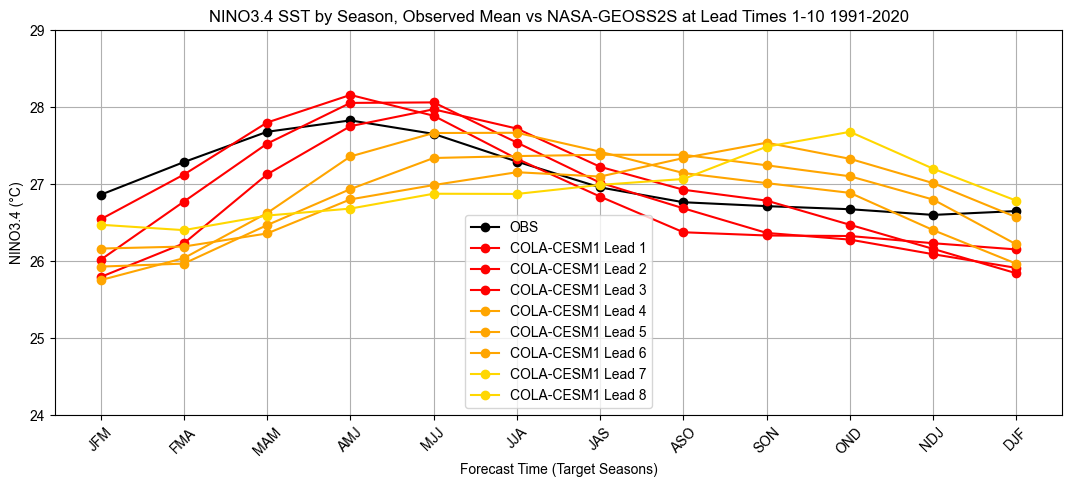

In [322]:
plt.figure(figsize=(13, 5))
plt.plot(obs_nino3_4['SZN'], obs_nino3_4['NINO3.4_L3'], marker='o', linestyle='-', color='black' , label = 'OBS')
colors = ['red','red', 'red', 'orange', 'orange', 'orange', 'gold', 'gold']
for i, color in enumerate(colors, start=1):
    plt.plot(nasa_stat_dfs[f'lead{i}']['SZN'], nasa_stat_dfs[f'lead{i}']['MEAN_SST_NASA_GEOSS2S'], marker='o', linestyle='-', color=color, label = f'COLA-CESM1 Lead {i}')
    

# Customize the plot
plt.title(f'NINO3.4 SST by Season, Observed Mean vs NASA-GEOSS2S at Lead Times 1-10 1991-2020')
plt.xlabel('Forecast Time (Target Seasons)')
plt.ylabel('NINO3.4 (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.ylim(ymin=24, ymax=29)

# Show the plot
plt.show()

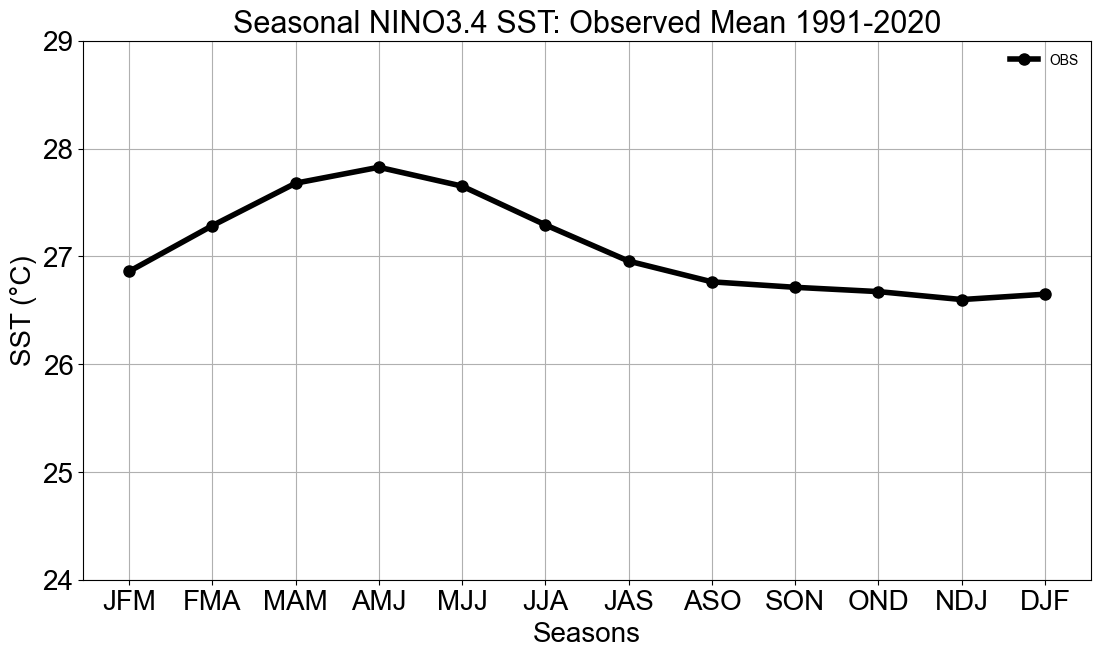

In [323]:
#follow this convention for all LDC graphs. 
def multimodel_obs_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(obs_nino3_4['SZN'], obs_nino3_4['NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    # Customize the plot
    plt.title(f'Seasonal NINO3.4 SST: Observed Mean 1991-2020',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax=29)
    plt.savefig(f'../Plots/seasonal_obs.png', format='png')
    # Show the plot
    plt.show()
    
multimodel_obs_visualizer()

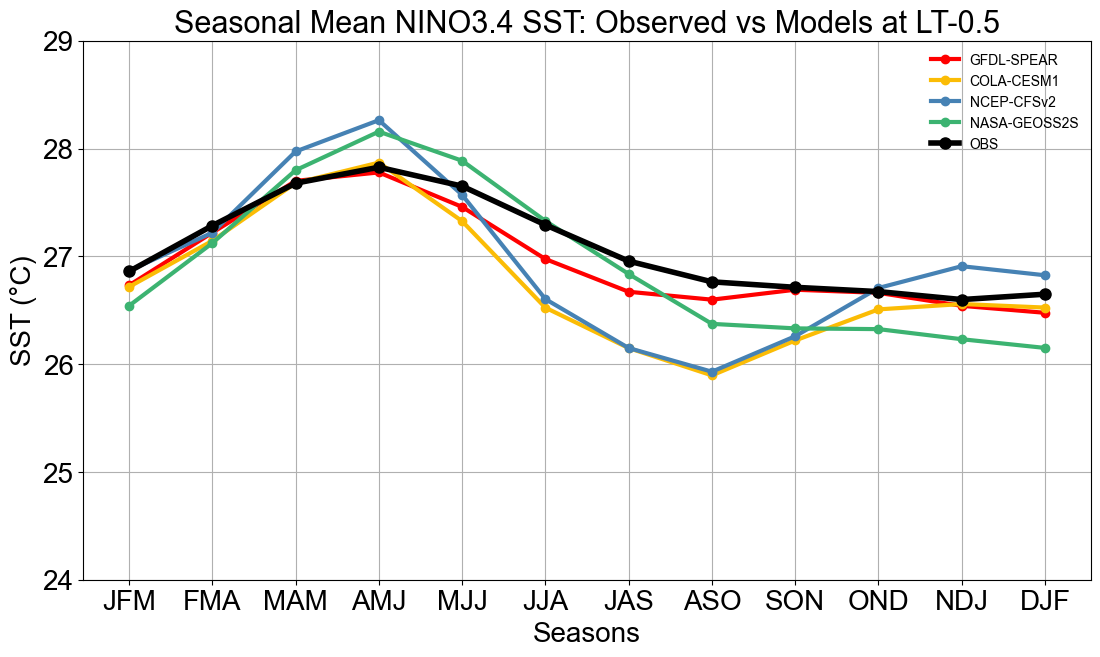

In [324]:
#follow this convention for all LDC graphs. 
def multimodel_sst_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_SST_NASA_GEOSS2S'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(obs_nino3_4['SZN'], obs_nino3_4['NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    # Customize the plot
    plt.title(f'Seasonal Mean NINO3.4 SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax=29)
    plt.savefig(f'../Plots/seasonal_mean_lead{lead}.png', format='png')
    # Show the plot
    plt.show()
    
multimodel_sst_visualizer(1)


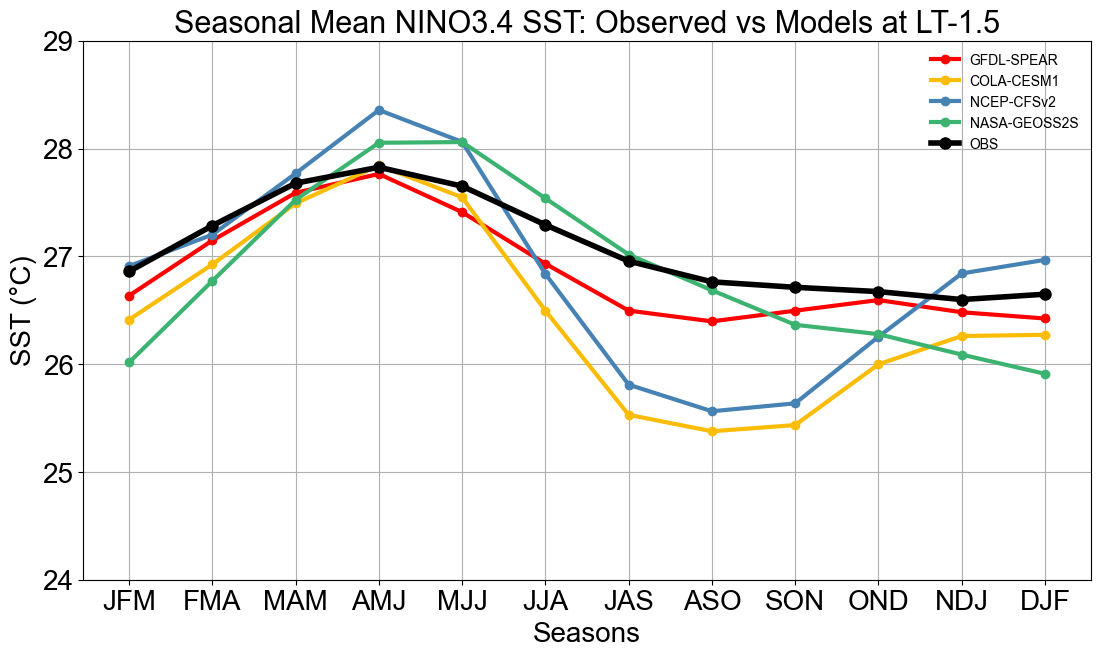

In [325]:
multimodel_sst_visualizer(2)

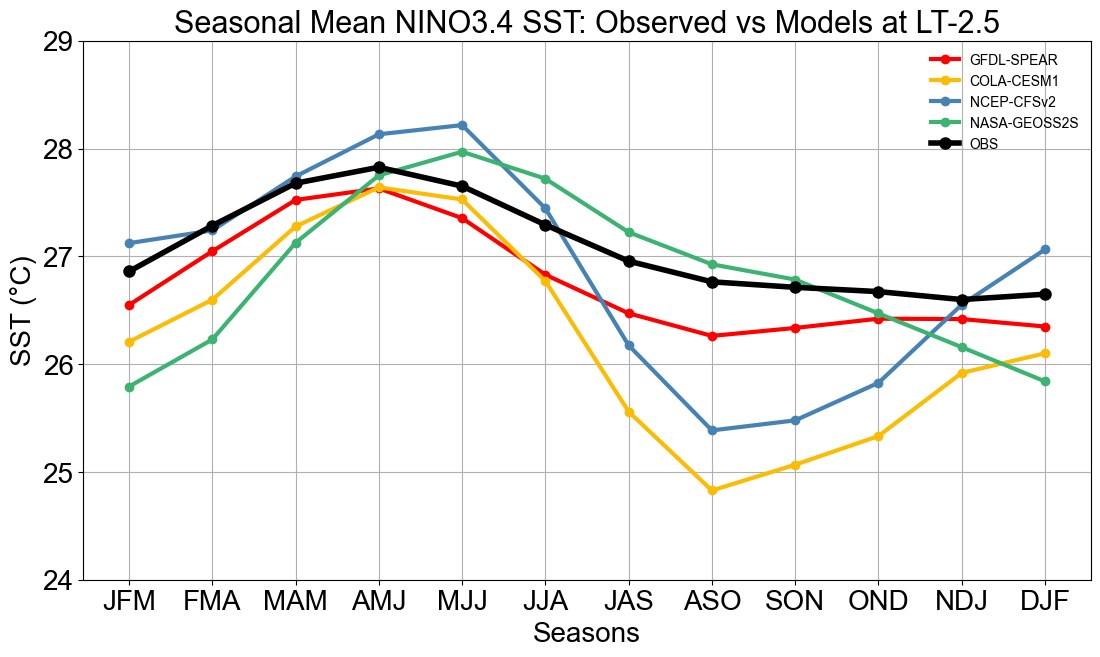

In [326]:
multimodel_sst_visualizer(3)

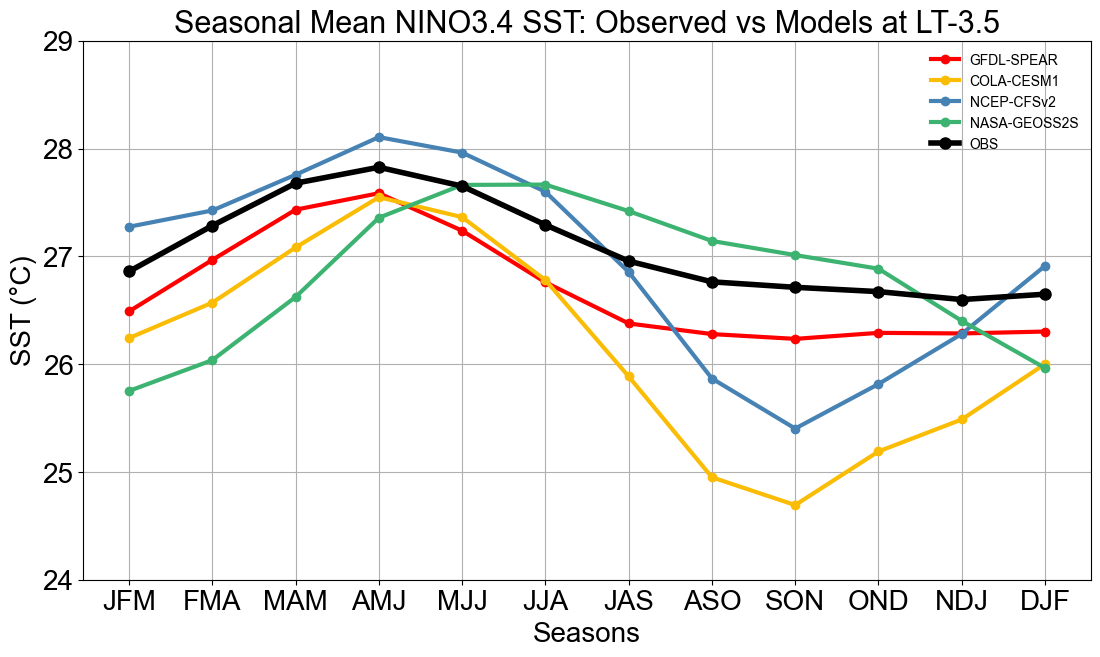

In [327]:
multimodel_sst_visualizer(4)

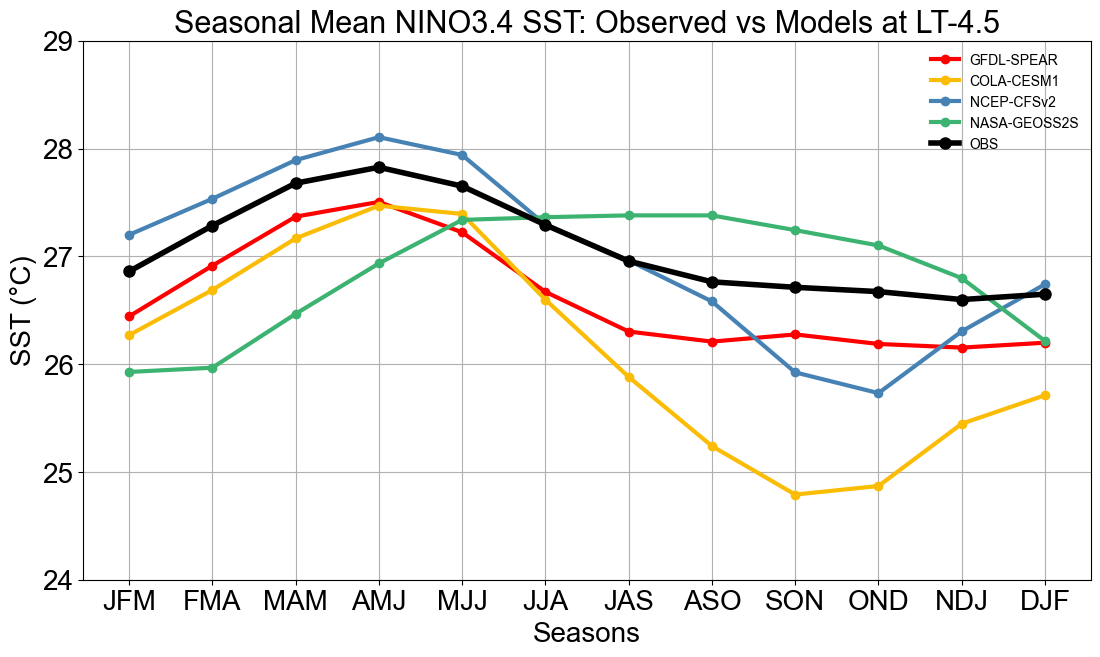

In [328]:
multimodel_sst_visualizer(5)

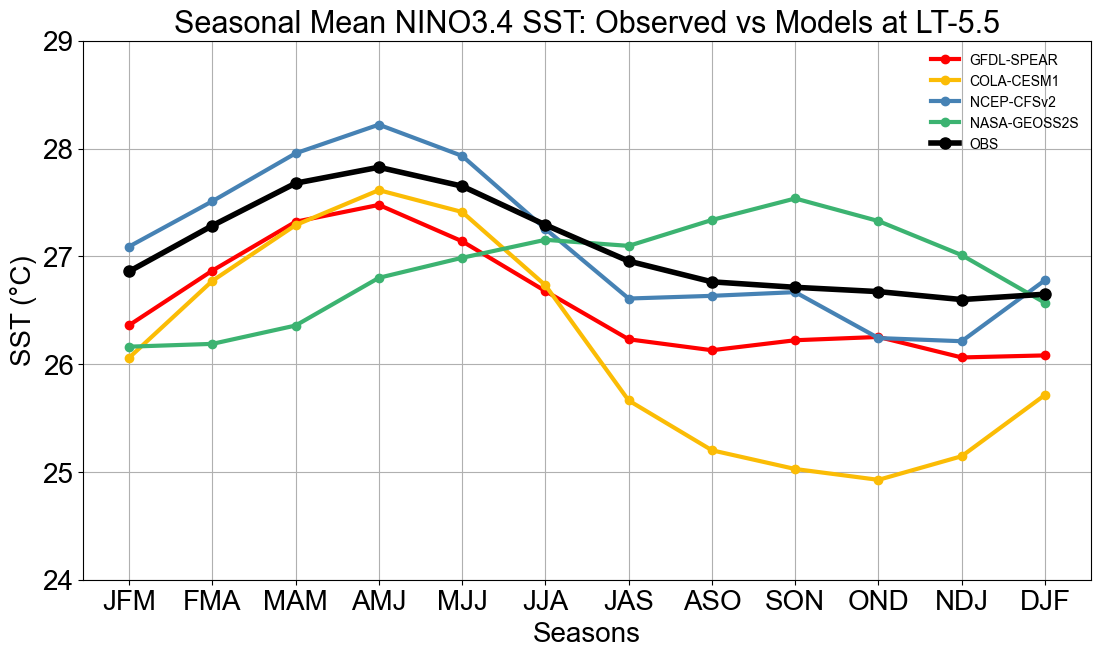

In [329]:
multimodel_sst_visualizer(6)

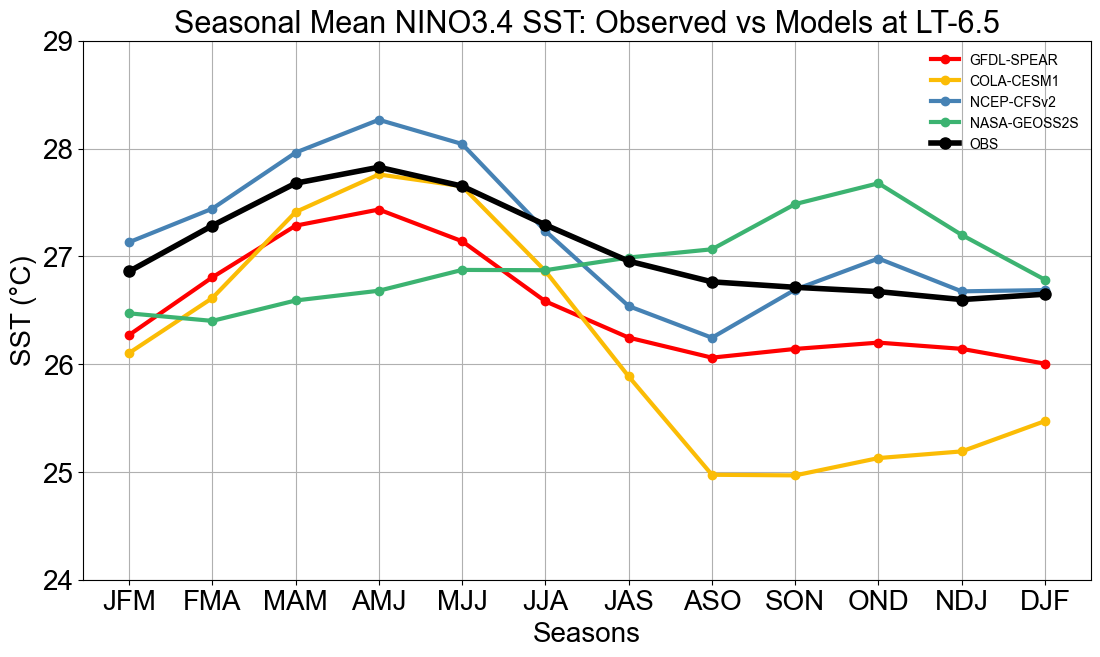

In [330]:
multimodel_sst_visualizer(7)

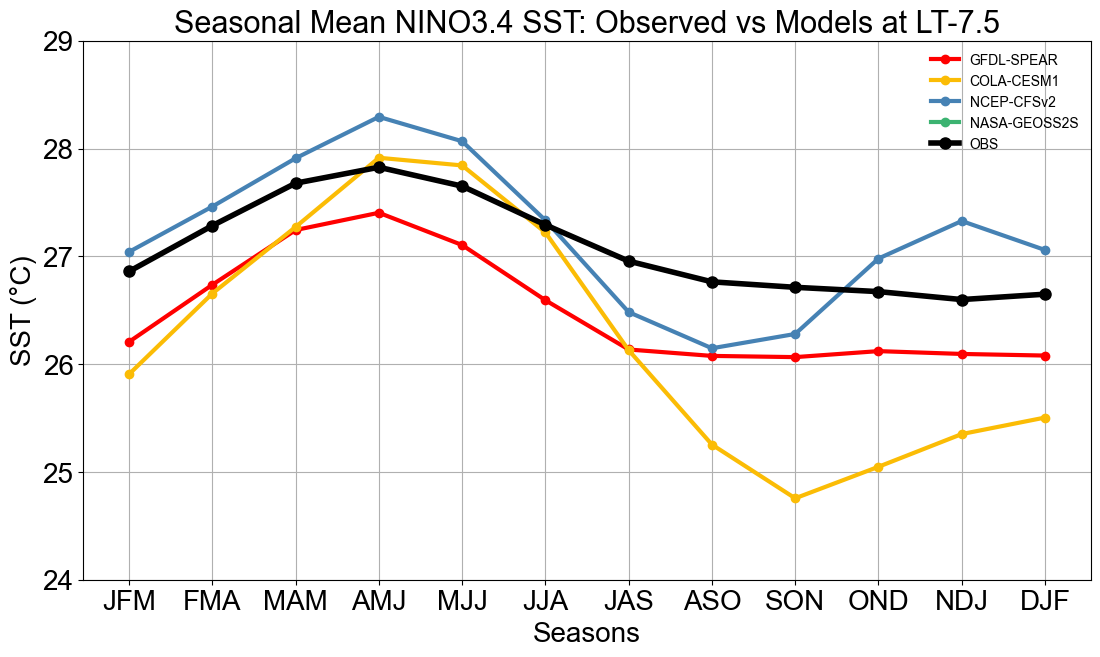

In [331]:
multimodel_sst_visualizer(8)

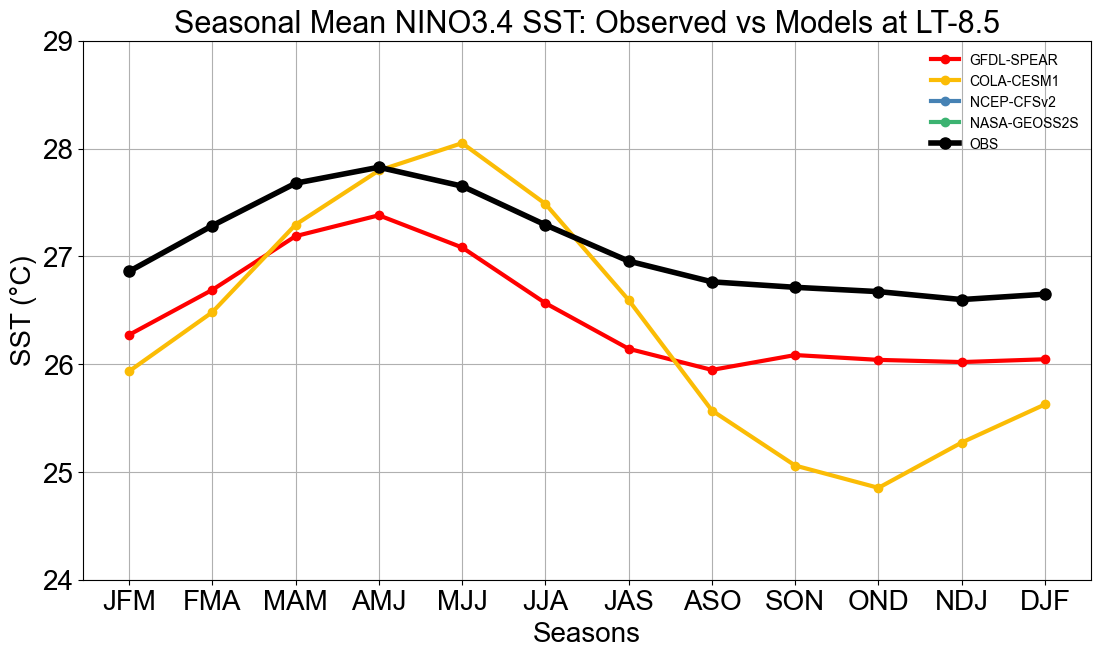

In [332]:
multimodel_sst_visualizer(9)

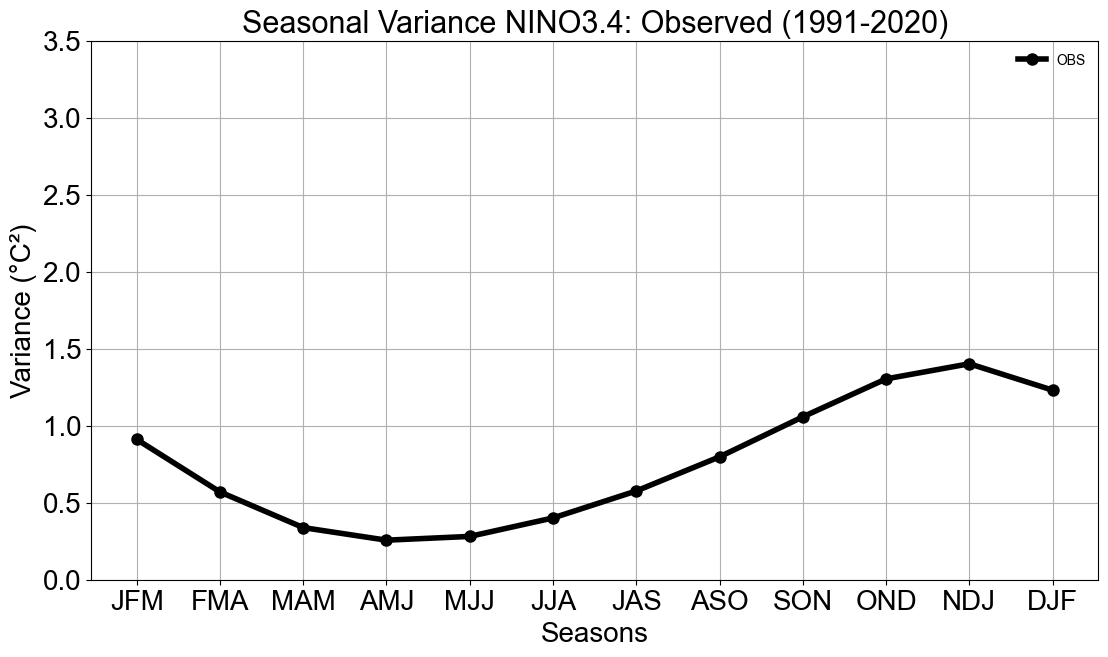

In [333]:
def multimodel_obs_var_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(obs_nino3_4['SZN'], obs_nino3_4['VARIANCE_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    # Customize the plot
    plt.title('Seasonal Variance NINO3.4: Observed (1991-2020)',size = 22)
    plt.xlabel('Seasons',size = 20)
    plt.ylabel('Variance (°C²)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=3.5)
    # Show the plot
    plt.savefig(f'../Plots/seasonal_variance_obs.png', format='png')
    plt.show()
multimodel_obs_var_visualizer()

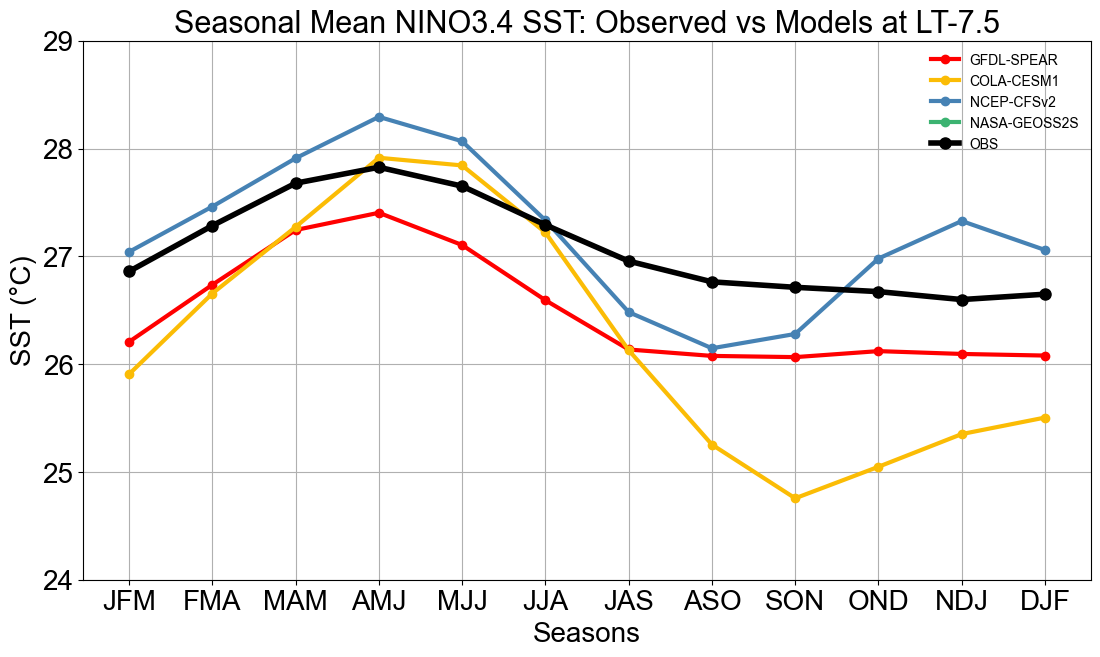

In [334]:
multimodel_sst_visualizer(8)

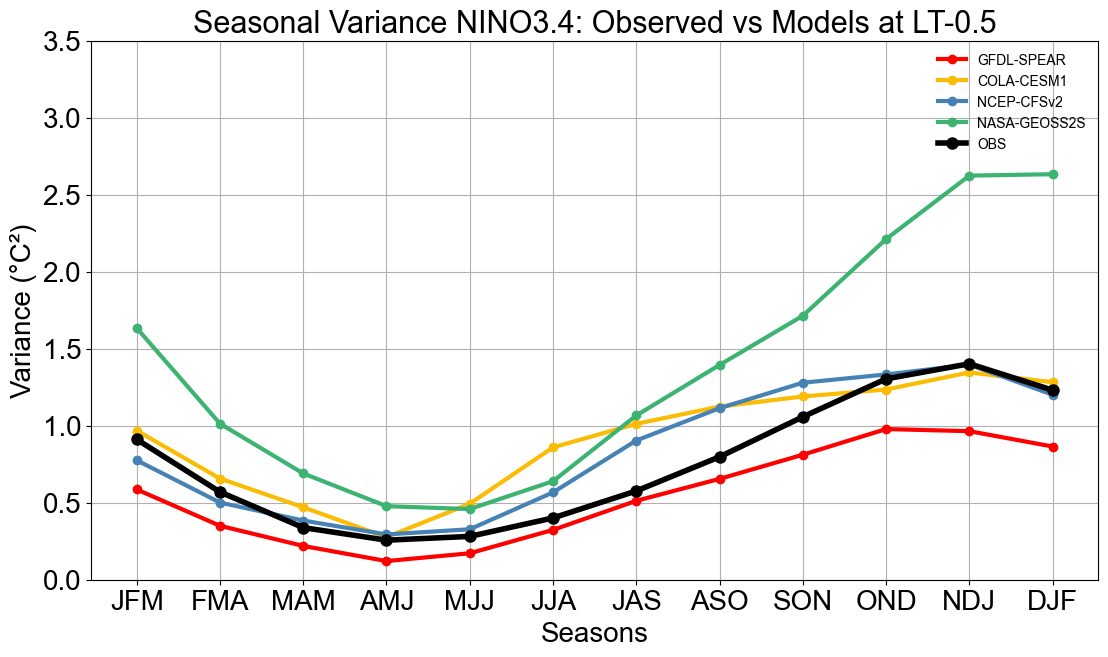

In [335]:
def multimodel_var_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(obs_nino3_4['SZN'], obs_nino3_4['VARIANCE_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    # Customize the plot
    plt.title(f'Seasonal Variance NINO3.4: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons',size = 20)
    plt.ylabel('Variance (°C²)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=3.5)
    # Show the plot
    plt.savefig(f'../Plots/seasonal_variance_lead{lead}.png', format='png')
    plt.show()
multimodel_var_visualizer(1)

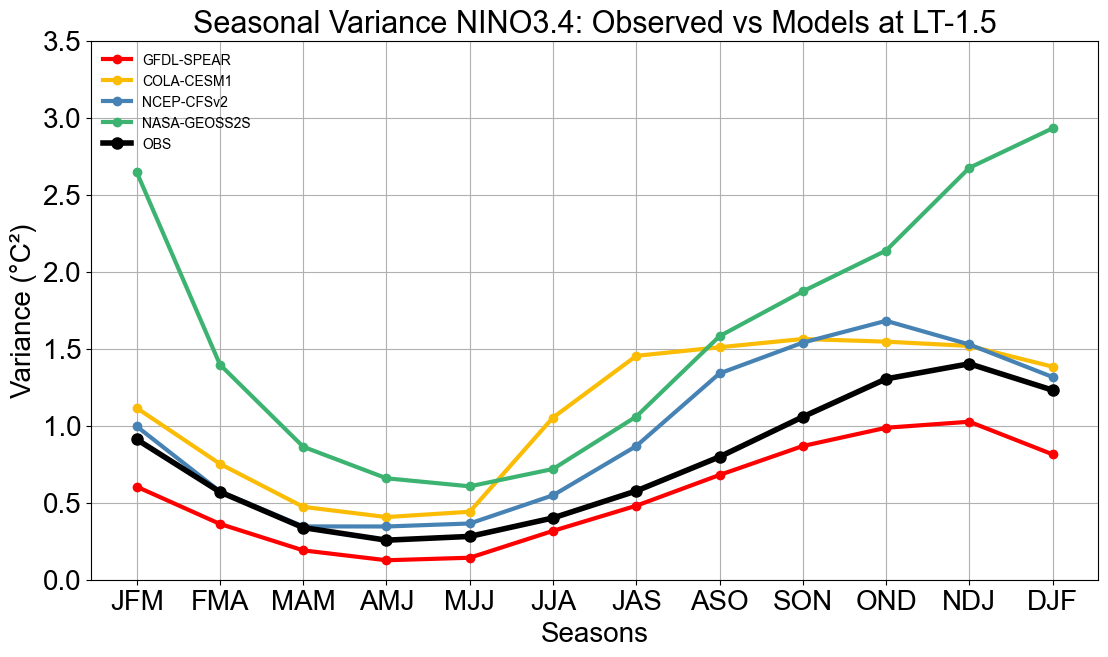

In [336]:
multimodel_var_visualizer(2)

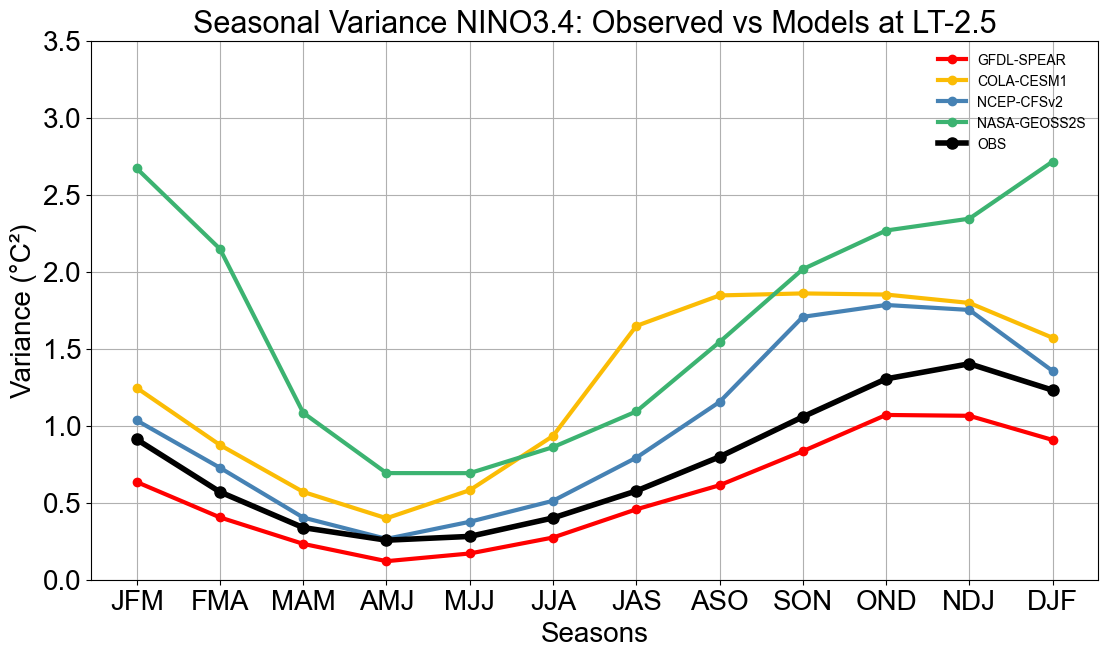

In [337]:
multimodel_var_visualizer(3)

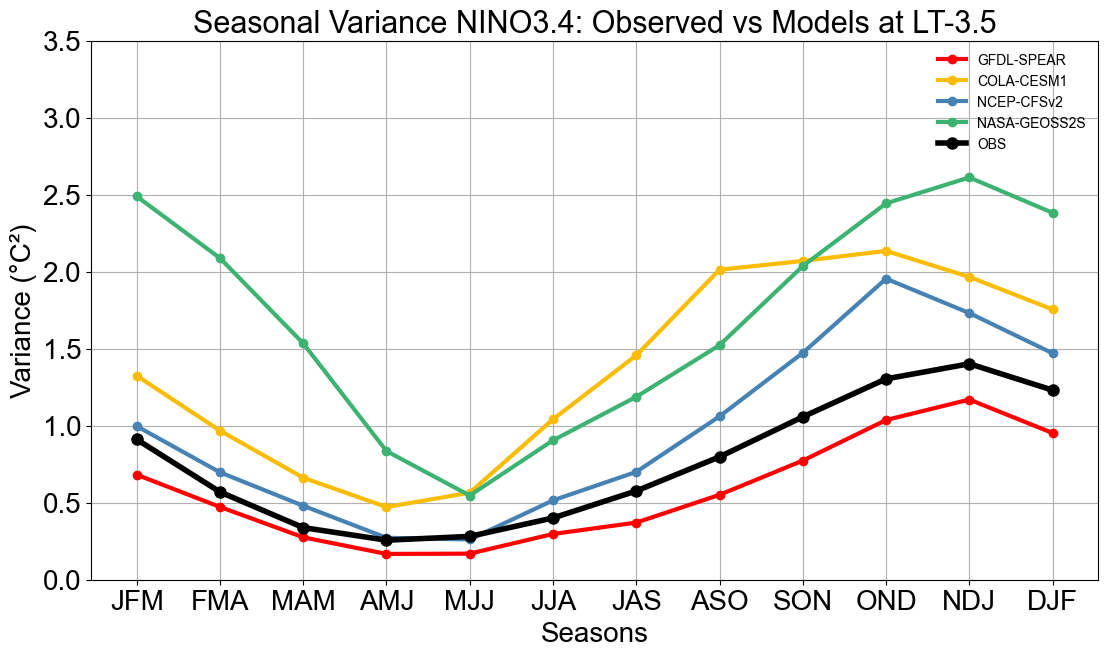

In [338]:
multimodel_var_visualizer(4)

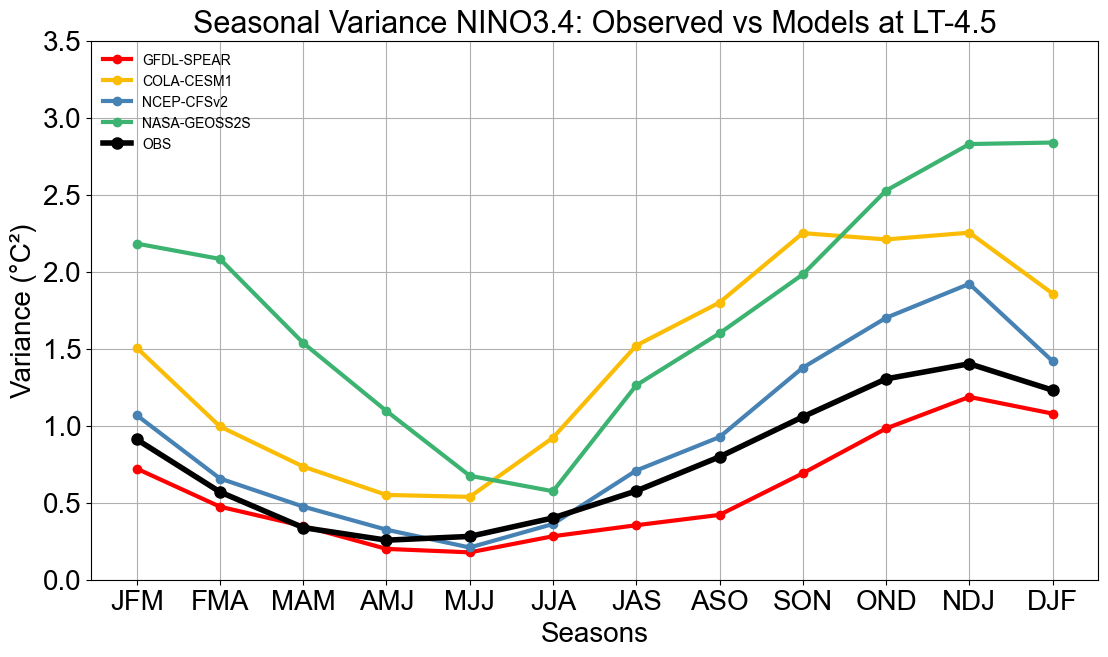

In [339]:
multimodel_var_visualizer(5)

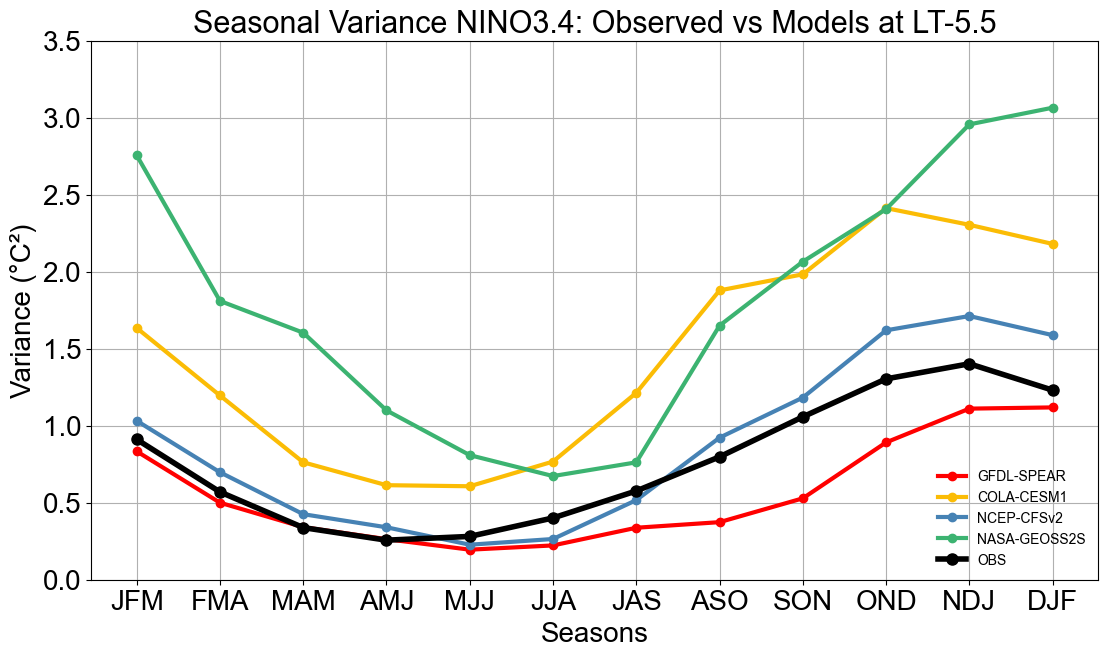

In [340]:
multimodel_var_visualizer(6)

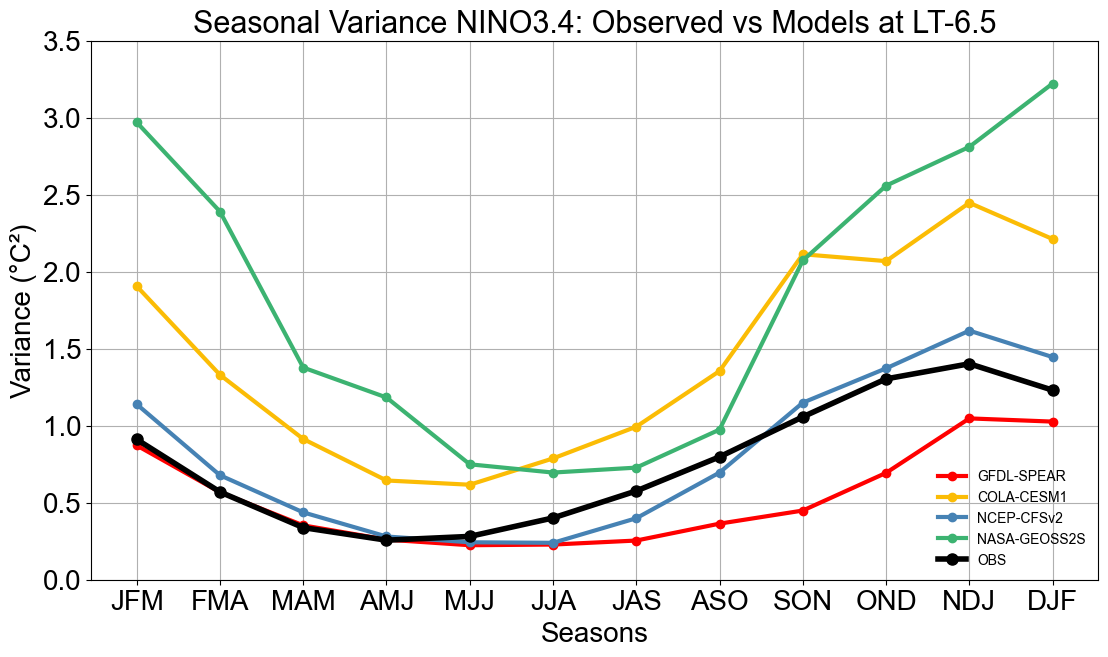

In [341]:
multimodel_var_visualizer(7)